In [1]:
import pandas as pd
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import zipfile

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC, SVC

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import l2

import tensorflow as tf
import tensorboard

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

# Download dataset

In [ ]:
https://www.kaggle.com/mlg-ulb/creditcardfraud

# Unzip Files

In [ ]:
with zipfile.ZipFile('./creditcardfraud.zip', 'r') as f:
    f.extractall('.')

In [2]:
df = pd.read_csv('./creditcard.csv')

In [3]:
df = df.dropna()
df = df.drop(columns='Time')

df.iloc[:, :-1] = (df.iloc[:, :-1] - df.iloc[:, :-1].mean()) / df.iloc[:, :-1].std()

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.694241,-0.044075,1.672771,0.973364,-0.245116,0.347067,0.193679,0.082637,0.331127,0.083385,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330891,-0.063781,0.244964,0
1,0.608495,0.161176,0.109797,0.316522,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153349,...,-0.307376,-0.880075,0.162201,-0.561130,0.320693,0.261069,-0.022256,0.044607,-0.342474,0
2,-0.693499,-0.811576,1.169466,0.268231,-0.364571,1.351451,0.639775,0.207372,-1.378673,0.190699,...,0.337631,1.063356,1.456317,-1.138090,-0.628536,-0.288446,-0.137137,-0.181021,1.160684,0
3,-0.493324,-0.112169,1.182514,-0.609726,-0.007469,0.936148,0.192070,0.316017,-1.262501,-0.050468,...,-0.147443,0.007267,-0.304776,-1.941024,1.241902,-0.460217,0.155396,0.186188,0.140534,0
4,-0.591329,0.531540,1.021410,0.284655,-0.295015,0.071998,0.479301,-0.226510,0.744325,0.691624,...,-0.012839,1.100009,-0.220123,0.233250,-0.395201,1.041609,0.543619,0.651815,-0.073403,0


In [4]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-1.407479e-15,-1.516852e-16,4.879472e-15,-4.845942e-16,1.868921e-15,-3.879947e-16,9.288721e-16,2.476859e-16,6.584334e-16,4.274129e-16,...,8.981359e-19,-1.591098e-15,-4.418829e-16,4.390887e-17,-1.757951e-15,-2.815406e-17,2.532244e-18,-8.781773e-18,2.308662e-13,0.001727
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.041527
min,-2.879850e+01,-4.403521e+01,-3.187168e+01,-4.013912e+00,-8.240795e+01,-1.963602e+01,-3.520933e+01,-6.130242e+01,-1.222799e+01,-2.258187e+01,...,-4.741898e+01,-1.506562e+01,-7.175434e+01,-4.683630e+00,-1.975030e+01,-5.401088e+00,-5.590650e+01,-4.674604e+01,-3.532288e-01,0.000000
25%,-4.698909e-01,-3.624701e-01,-5.872131e-01,-5.993777e-01,-5.010677e-01,-5.766811e-01,-4.478852e-01,-1.746801e-01,-5.853621e-01,-4.917352e-01,...,-3.109428e-01,-7.473463e-01,-2.591780e-01,-5.854666e-01,-6.083990e-01,-6.780705e-01,-1.755050e-01,-1.604437e-01,-3.308395e-01,0.000000
50%,9.245335e-03,3.965677e-02,1.186122e-01,-1.401721e-02,-3.936675e-02,-2.058043e-01,3.241718e-02,1.871979e-02,-4.681161e-02,-8.533536e-02,...,-4.009422e-02,9.345360e-03,-1.792417e-02,6.765666e-02,3.183234e-02,-1.081215e-01,3.325168e-03,3.406362e-02,-2.652710e-01,0.000000
75%,6.716927e-01,4.867194e-01,6.774557e-01,5.250073e-01,4.433457e-01,2.991620e-01,4.611099e-01,2.740780e-01,5.435296e-01,4.168834e-01,...,2.537387e-01,7.283347e-01,2.364315e-01,7.257141e-01,6.727994e-01,4.996654e-01,2.255644e-01,2.371521e-01,-4.471699e-02,0.000000
max,1.253349e+00,1.335773e+01,6.187982e+00,1.191872e+01,2.521409e+01,5.502005e+01,9.747807e+01,1.675150e+01,1.419492e+01,2.180754e+01,...,3.703465e+01,1.447302e+01,3.607661e+01,7.569671e+00,1.442529e+01,7.293962e+00,7.831926e+01,1.025432e+02,1.023621e+02,1.000000


In [5]:
df.Amount.describe()

count    2.848070e+05
mean     2.308662e-13
std      1.000000e+00
min     -3.532288e-01
25%     -3.308395e-01
50%     -2.652710e-01
75%     -4.471699e-02
max      1.023621e+02
Name: Amount, dtype: float64

In [6]:
fraud_transactions = df[df.Class == 1]
fraud_transactions_array = fraud_transactions.to_numpy()
print("Fraud Transaction Array shape:", fraud_transactions_array.shape)

non_fraud_transactions = df[df.Class == 0]
non_fraud_transactions_array = non_fraud_transactions.to_numpy()
print("Non-Fraud Transaction Array shape:", non_fraud_transactions_array.shape)

Fraud Transaction Array shape: (492, 30)
Non-Fraud Transaction Array shape: (284315, 30)


In [7]:
non_fraud = non_fraud_transactions_array[:508]

print("Train Non-Fraud samples shape:", non_fraud.shape)

Train Non-Fraud samples shape: (508, 30)


In [8]:
Data = np.concatenate((fraud_transactions_array, non_fraud))

In [9]:
print("Total train shape:", Data.shape)

Total train shape: (1000, 30)


In [10]:
train_test_ratio = 0.9

In [11]:
random.shuffle(Data)

x_train = Data[:math.floor(train_test_ratio * len(Data))][:, :29]
y_train = Data[:math.floor(train_test_ratio * len(Data))][:, 29]

x_test = Data[math.floor(train_test_ratio * len(Data)):][:, :29]
y_test = Data[math.floor(train_test_ratio * len(Data)):][:, 29]

print("X train shape:", x_train.shape)
print("y train shape:", y_train.shape)
print()
print("X test shape:", x_test.shape)
print("y test shape:", y_test.shape)

X train shape: (900, 29)
y train shape: (900,)

X test shape: (100, 29)
y test shape: (100,)


# Classification function

In [83]:
def classify(y, threshold=0.5):
    new_y = []
    for x in y:
        if x >= threshold:
            new_y.append(float(1.))
        else:
            new_y.append(float(0.))
    return np.asarray(new_y)

# Linear Regression

In [64]:
linear_regression_clf = LinearRegression(fit_intercept=True, normalize=True)

In [14]:
linear_regression_clf.fit(X=x_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [15]:
y_predict = linear_regression_clf.predict(X=x_test)

In [16]:
y_predict = classify(y_predict)

In [17]:
true_guesses = np.sum(y_predict == y_test)
accuracy_over_validation_set = true_guesses / len(y_test)
print("[Linear Regression] --> Accuracy over validation set:", accuracy_over_validation_set)

[Linear Regression] --> Accuracy over validation set: 0.67


# Logistic Regression

In [18]:
logistic_regression_clf = LogisticRegression(verbose=1, penalty='l2', max_iter=100)

In [19]:
history = logistic_regression_clf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [20]:
y_predict = logistic_regression_clf.predict(x_test)

In [21]:
y_predict = classify(y_predict)

In [22]:
true_guesses = np.sum(y_predict == y_test)
accuracy_over_validation_set = true_guesses / len(y_test)
print("[Logistic Regression] --> Accuracy over validation set:", accuracy_over_validation_set)

[Logistic Regression] --> Accuracy over validation set: 0.87


# Linear SVC

In [23]:
linear_svc_clf = LinearSVC(penalty='l2', verbose=True)

In [24]:
history = linear_svc_clf.fit(x_train, y_train)

[LibLinear]

/home/farzam/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [25]:
y_predict = linear_svc_clf.predict(x_test)

In [26]:
true_guesses = np.sum(y_predict == y_test)
accuracy_over_validation_set = true_guesses / len(y_test)
print("[Linear SVC] --> Accuracy over validation set:", accuracy_over_validation_set)

[Linear SVC] --> Accuracy over validation set: 0.91


# SVC
* We use [Radial Basis Function (RBF) kernel SVM](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html) as kernel to classify our data.

In [27]:
svc_clf = SVC(kernel='rbf', gamma='auto')

In [28]:
history = svc_clf.fit(x_train, y_train)

In [29]:
y_predict = svc_clf.predict(x_test)

In [30]:
true_guesses = np.sum(y_predict == y_test)
accuracy_over_validation_set = true_guesses / len(y_test)
print("[SVC with BRF kernel] --> Accuracy over validation set:", accuracy_over_validation_set)

[SVC with BRF kernel] --> Accuracy over validation set: 0.93


# Neural network

In [31]:
model = Sequential([
    layers.Dense(16, activation='relu', kernel_regularizer=l2(0.005)),
    layers.Dense(32, activation='relu', kernel_regularizer=l2(0.005)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [32]:
model.compile(tf.keras.optimizers.SGD(0.005), loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [33]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500)

Train on 900 samples, validate on 100 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
900/900 [==============================] - 1s 1ms/sample - loss: 1.1223 - acc: 0.3067 - val_loss: 0.9366 - val_acc: 0.5400
Epoch 2/500
900/900 [==============================] - 0s 281us/sample - loss: 0.9440 - acc: 0.6744 - val_loss: 0.9078 - val_acc: 0.6600
Epoch 3/500
900/900 [==============================] - 0s 194us/sample - loss: 0.8913 - acc: 0.7933 - val_loss: 0.8934 - val_acc: 0.5900
Epoch 4/500
900/900 [==============================] - 0s 298us/sample - loss: 0.8535 - acc: 0.8311 - val_loss: 0.8835 - val_acc: 0.5700
Epoch 5/500
900/900 [==============================] - 0s 237us/sample - loss: 0.8216 - acc: 0.8522 - val_loss: 0.8743 - val_acc: 0.5500
Epoch 6/500
900/900 [==============================] - 0s 279us/sample - loss: 0.7880 - acc: 0.8633 - val_loss: 0.8600 - val_acc: 0.5500
Epoch 7/500
900/900 [==============================] - 0s 287us/sample - loss: 0.7428 

900/900 [==============================] - 0s 130us/sample - loss: 0.2747 - acc: 0.9489 - val_loss: 0.4422 - val_acc: 0.8800
Epoch 118/500
900/900 [==============================] - 0s 145us/sample - loss: 0.2739 - acc: 0.9489 - val_loss: 0.4409 - val_acc: 0.8800
Epoch 119/500
900/900 [==============================] - 0s 146us/sample - loss: 0.2730 - acc: 0.9489 - val_loss: 0.4392 - val_acc: 0.8800
Epoch 120/500
900/900 [==============================] - 0s 124us/sample - loss: 0.2722 - acc: 0.9489 - val_loss: 0.4372 - val_acc: 0.8800
Epoch 121/500
900/900 [==============================] - 0s 143us/sample - loss: 0.2713 - acc: 0.9489 - val_loss: 0.4356 - val_acc: 0.8800
Epoch 122/500
900/900 [==============================] - 0s 128us/sample - loss: 0.2705 - acc: 0.9500 - val_loss: 0.4333 - val_acc: 0.8800
Epoch 123/500
900/900 [==============================] - 0s 128us/sample - loss: 0.2696 - acc: 0.9511 - val_loss: 0.4329 - val_acc: 0.8800
Epoch 124/500
900/900 [==================

900/900 [==============================] - 0s 118us/sample - loss: 0.2282 - acc: 0.9667 - val_loss: 0.3652 - val_acc: 0.9200
Epoch 177/500
900/900 [==============================] - 0s 117us/sample - loss: 0.2275 - acc: 0.9667 - val_loss: 0.3640 - val_acc: 0.9200
Epoch 178/500
900/900 [==============================] - 0s 129us/sample - loss: 0.2267 - acc: 0.9667 - val_loss: 0.3619 - val_acc: 0.9200
Epoch 179/500
900/900 [==============================] - 0s 112us/sample - loss: 0.2260 - acc: 0.9667 - val_loss: 0.3617 - val_acc: 0.9200
Epoch 180/500
900/900 [==============================] - 0s 112us/sample - loss: 0.2252 - acc: 0.9667 - val_loss: 0.3597 - val_acc: 0.9200
Epoch 181/500
900/900 [==============================] - 0s 115us/sample - loss: 0.2245 - acc: 0.9678 - val_loss: 0.3587 - val_acc: 0.9200
Epoch 182/500
900/900 [==============================] - 0s 118us/sample - loss: 0.2238 - acc: 0.9667 - val_loss: 0.3575 - val_acc: 0.9200
Epoch 183/500
900/900 [==================

900/900 [==============================] - 0s 164us/sample - loss: 0.1646 - acc: 0.9756 - val_loss: 0.2894 - val_acc: 0.9300
Epoch 295/500
900/900 [==============================] - 0s 102us/sample - loss: 0.1642 - acc: 0.9756 - val_loss: 0.2901 - val_acc: 0.9300
Epoch 296/500
900/900 [==============================] - 0s 106us/sample - loss: 0.1638 - acc: 0.9756 - val_loss: 0.2895 - val_acc: 0.9300
Epoch 297/500
900/900 [==============================] - 0s 102us/sample - loss: 0.1634 - acc: 0.9756 - val_loss: 0.2898 - val_acc: 0.9300
Epoch 298/500
900/900 [==============================] - 0s 120us/sample - loss: 0.1630 - acc: 0.9756 - val_loss: 0.2895 - val_acc: 0.9300
Epoch 299/500
900/900 [==============================] - 0s 157us/sample - loss: 0.1626 - acc: 0.9756 - val_loss: 0.2889 - val_acc: 0.9300
Epoch 300/500
900/900 [==============================] - 0s 117us/sample - loss: 0.1623 - acc: 0.9756 - val_loss: 0.2886 - val_acc: 0.9300
Epoch 301/500
900/900 [==================

900/900 [==============================] - 0s 121us/sample - loss: 0.1434 - acc: 0.9833 - val_loss: 0.2764 - val_acc: 0.9400
Epoch 354/500
900/900 [==============================] - 0s 145us/sample - loss: 0.1430 - acc: 0.9856 - val_loss: 0.2757 - val_acc: 0.9400
Epoch 355/500
900/900 [==============================] - 0s 131us/sample - loss: 0.1427 - acc: 0.9856 - val_loss: 0.2737 - val_acc: 0.9400
Epoch 356/500
900/900 [==============================] - 0s 164us/sample - loss: 0.1423 - acc: 0.9856 - val_loss: 0.2757 - val_acc: 0.9400
Epoch 357/500
900/900 [==============================] - 0s 128us/sample - loss: 0.1420 - acc: 0.9856 - val_loss: 0.2752 - val_acc: 0.9400
Epoch 358/500
900/900 [==============================] - 0s 127us/sample - loss: 0.1416 - acc: 0.9856 - val_loss: 0.2745 - val_acc: 0.9400
Epoch 359/500
900/900 [==============================] - 0s 111us/sample - loss: 0.1413 - acc: 0.9856 - val_loss: 0.2742 - val_acc: 0.9400
Epoch 360/500
900/900 [==================

900/900 [==============================] - 0s 155us/sample - loss: 0.1257 - acc: 0.9911 - val_loss: 0.2641 - val_acc: 0.9300
Epoch 413/500
900/900 [==============================] - 0s 145us/sample - loss: 0.1254 - acc: 0.9900 - val_loss: 0.2639 - val_acc: 0.9300
Epoch 414/500
900/900 [==============================] - 0s 143us/sample - loss: 0.1252 - acc: 0.9900 - val_loss: 0.2647 - val_acc: 0.9300
Epoch 415/500
900/900 [==============================] - 0s 147us/sample - loss: 0.1249 - acc: 0.9900 - val_loss: 0.2642 - val_acc: 0.9300
Epoch 416/500
900/900 [==============================] - 0s 119us/sample - loss: 0.1246 - acc: 0.9900 - val_loss: 0.2640 - val_acc: 0.9300
Epoch 417/500
900/900 [==============================] - 0s 135us/sample - loss: 0.1243 - acc: 0.9900 - val_loss: 0.2628 - val_acc: 0.9300
Epoch 418/500
900/900 [==============================] - 0s 126us/sample - loss: 0.1241 - acc: 0.9900 - val_loss: 0.2625 - val_acc: 0.9300
Epoch 419/500
900/900 [==================

900/900 [==============================] - 0s 129us/sample - loss: 0.1114 - acc: 0.9922 - val_loss: 0.2541 - val_acc: 0.9200
Epoch 472/500
900/900 [==============================] - 0s 121us/sample - loss: 0.1111 - acc: 0.9922 - val_loss: 0.2549 - val_acc: 0.9200
Epoch 473/500
900/900 [==============================] - 0s 98us/sample - loss: 0.1109 - acc: 0.9922 - val_loss: 0.2552 - val_acc: 0.9200
Epoch 474/500
900/900 [==============================] - 0s 104us/sample - loss: 0.1106 - acc: 0.9922 - val_loss: 0.2554 - val_acc: 0.9200
Epoch 475/500
900/900 [==============================] - 0s 112us/sample - loss: 0.1104 - acc: 0.9922 - val_loss: 0.2557 - val_acc: 0.9200
Epoch 476/500
900/900 [==============================] - 0s 139us/sample - loss: 0.1102 - acc: 0.9922 - val_loss: 0.2550 - val_acc: 0.9200
Epoch 477/500
900/900 [==============================] - 0s 119us/sample - loss: 0.1100 - acc: 0.9922 - val_loss: 0.2550 - val_acc: 0.9200
Epoch 478/500
900/900 [===================

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [35]:
print("Training acc:", acc[-1])
print("Test acc:", val_acc[-1])

Training acc: 0.99222225
Test acc: 0.91


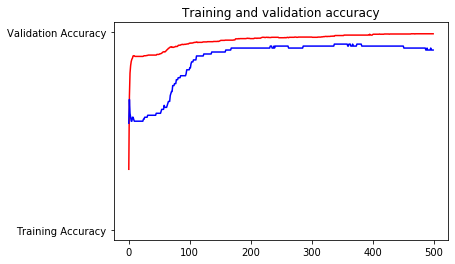

Text(0.5, 1.0, 'Training and validation loss')

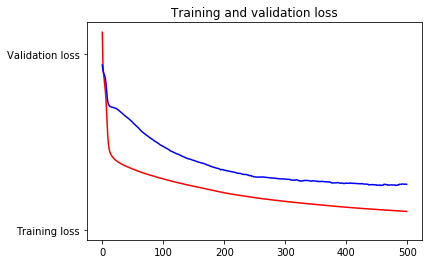

In [36]:
epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')

plt.show()

plt.plot(epochs, loss, 'r', "Training loss")
plt.plot(epochs, val_loss, 'b', "Validation loss")
plt.title('Training and validation loss')

# Percision and Recall Approach
* Here is the precision and recall formula:

![image of formula](./plots/precision_recall.jpeg)

# Redeclaring X , y

In [37]:
Data = df.to_numpy()

train_test_ratio = 0.9

random.shuffle(Data)

X = Data[:, :-1]
y = Data[:, -1]

x_train = X[:math.floor(train_test_ratio * len(X))]
y_train = y[:math.floor(train_test_ratio * len(y))]

x_test = X[math.floor(train_test_ratio * len(X)):]
y_test = y[math.floor(train_test_ratio * len(y)):]

print("X train shape:", x_train.shape)
print("y train shape:", y_train.shape)
print()
print("X test shape:", x_test.shape)
print("y test shape:", y_test.shape)

X train shape: (256326, 29)
y train shape: (256326,)

X test shape: (28481, 29)
y test shape: (28481,)


In [65]:
logistic_regression_clf = LogisticRegression(verbose=1, penalty='l2', max_iter=500, solver='lbfgs')

In [66]:
history = logistic_regression_clf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s finished


In [67]:
y_prob = logistic_regression_clf.predict_proba(x_test)

In [41]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob[:, 1])

(0, 1)

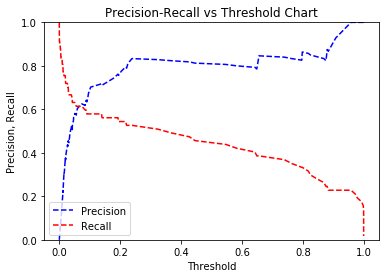

In [42]:
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precisions[: -1], "b--", label="Precision")
plt.plot(thresholds, recalls[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [43]:
def compute_F1_scores(precisions, recalls):
    assert len(precisions) == len(recalls)
    F1_scores = []
    for i in range(len(precisions)):
        F1_score = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
        F1_scores.append(F1_score)
    return np.asarray(F1_scores)

In [44]:
def compute_single_F1_scores(precisions, recalls):
    F1_score = 2 * (precisions * recalls) / (precisions + recalls)
    return F1_score

In [45]:
F1_scores = compute_F1_scores(precisions, recalls)   

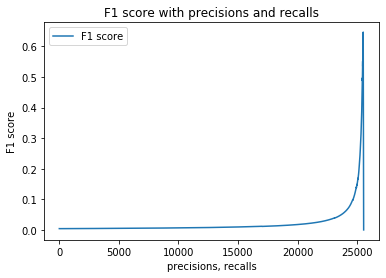

In [46]:
plt.plot(F1_scores, label='F1 score')
plt.title("F1 score with precisions and recalls")
plt.ylabel("F1 score")
plt.xlabel("precisions, recalls")
plt.legend(loc="upper left")
plt.show()

In [84]:
max_F1_score_index = F1_scores.argmax()

In [85]:
print("Maximum F1 score: %.4f" % F1_scores[max_F1_score_index])
print("Properties:\n\tPercision: %.4f\n\tRecall: %4.f\n\tThreshold: %f" % (precisions[max_F1_score_index], recalls[max_F1_score_index], thresholds[max_F1_score_index]))

Maximum F1 score: 0.6465
Properties:
	Percision: 0.7619
	Recall:    1
	Threshold: 0.192877


In [86]:
y_pred = logistic_regression_clf.predict_proba(x_test)

In [87]:
selected_threshold = thresholds[max_F1_score_index]
print("Selected threshold:", selected_threshold)

Selected threshold: 0.19287650708148127


In [88]:
y_predict = classify(y_pred[:, 1], selected_threshold)

In [91]:
true_guesses = np.sum(y_predict == y_test)
accuracy_over_validation_set = true_guesses / len(y_test)
print("[Logistic Regression] --> Accuracy over validation set:", accuracy_over_validation_set)

[Logistic Regression] --> Accuracy over validation set: 0.9987711105649381


# Computing F1-score

In [93]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)

In [94]:
print("Precision value:", precision)
print("Recall value:", recall)

Precision value: 0.7619047619047619
Recall value: 0.5614035087719298


In [95]:
F1_score = compute_single_F1_scores(precisions=precision, recalls=recall)

In [96]:
print("F1-score of predicted probability is %.6f" % F1_score)

F1-score of predicted probability is 0.646465
